<a href="https://colab.research.google.com/github/ajrodr70/SDS510Bstudent/blob/main/SDS510M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
n=pd.read_csv('/content/crime-data_crime-data_crimestat.csv')
print(n.columns.tolist())

/tmp/ipython-input-2125488071.py:7: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



['INC NUMBER', 'OCCURRED ON', 'OCCURRED TO', 'UCR CRIME CATEGORY', '100 BLOCK ADDR', 'ZIP', 'PREMISE TYPE', 'GRID']


/tmp/ipython-input-2224501370.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2224501370.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2224501370.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



    UCR CRIME CATEGORY    ZIP
0                 RAPE  85006
1        LARCENY-THEFT  85014
2        LARCENY-THEFT  85014
3  MOTOR VEHICLE THEFT  85043
4  MOTOR VEHICLE THEFT  85029


<Figure size 1500x700 with 0 Axes>

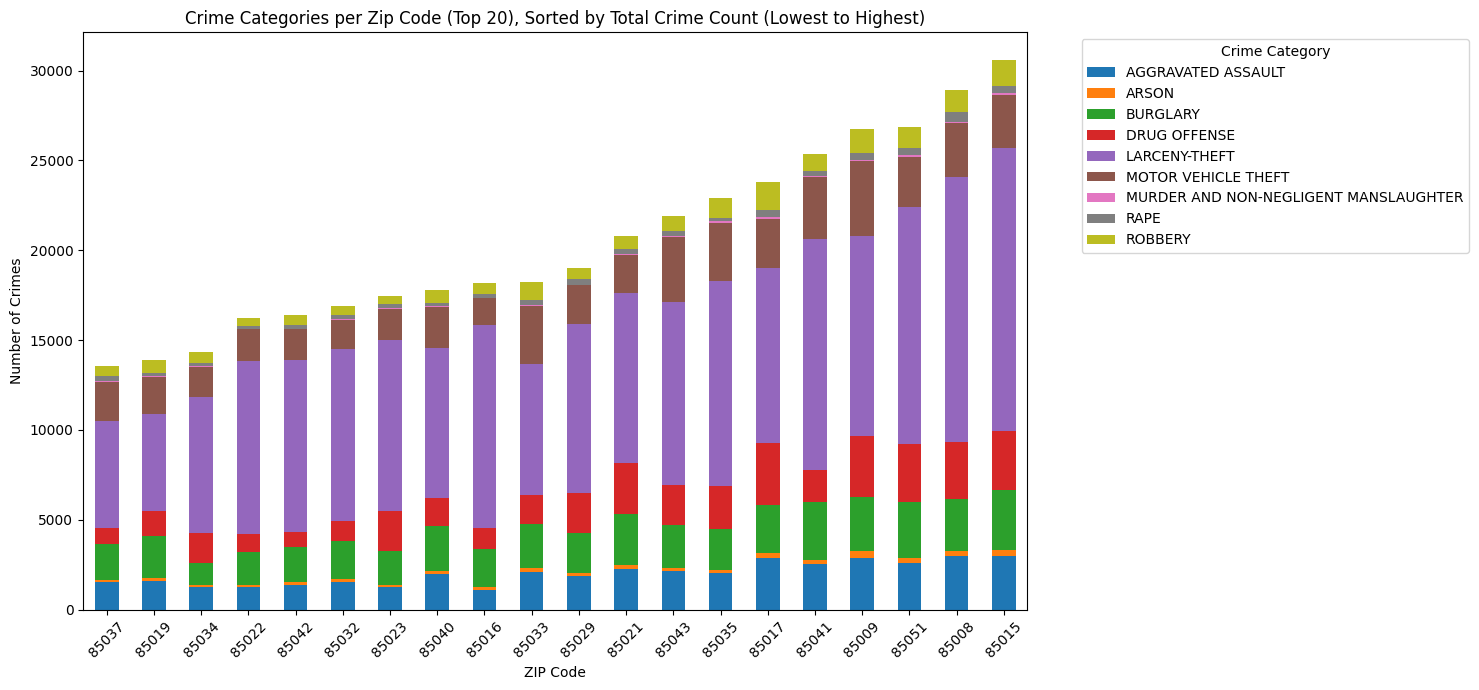

In [95]:
# Group crime by zipcodes
zip_crime = n[['UCR CRIME CATEGORY', 'ZIP']]

# Convert columns to categorical
zip_crime['UCR CRIME CATEGORY'] = zip_crime['UCR CRIME CATEGORY'].astype('category')
# Fill NaN values with a placeholder and convert to integer, then to categorical
zip_crime['ZIP'] = zip_crime['ZIP'].fillna(-1).astype(int).astype('category')
print(zip_crime.head())

# Count the occurrences of each zip code and crime category
zip_crime_counts = zip_crime.groupby(['ZIP', 'UCR CRIME CATEGORY']).size().reset_index(name='Count')

# Get the top 20 zip codes based on total crime count
zip_total_counts = zip_crime['ZIP'].value_counts().reset_index()
zip_total_counts.columns = ['ZIP', 'Total_Count']
top_20_zips = zip_total_counts['ZIP'].head(20).tolist()

# Filter the crime counts to include only the top 20 zipcodes
zip_crime_counts_filtered = zip_crime_counts[zip_crime_counts['ZIP'].isin(top_20_zips)]

# Pivot the data for stacked bar chart
zip_crime_pivot = zip_crime_counts_filtered.pivot(index='ZIP', columns='UCR CRIME CATEGORY', values='Count').fillna(0)

# Sort the data by the total number of crimes in each zip code, from lowest to highest
zip_crime_pivot['Total'] = zip_crime_pivot.sum(axis=1)
zip_crime_pivot_sorted = zip_crime_pivot.sort_values('Total').drop('Total', axis=1)

# Create a stacked bar chart
plt.figure(figsize=(15, 7))
zip_crime_pivot_sorted.plot(kind='bar', stacked=True, figsize=(15, 7))

plt.title('Crime Categories per Zip Code (Top 20), Sorted by Total Crime Count (Lowest to Highest)')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

    UCR CRIME CATEGORY OCCURRED ON        DATE MONTH  YEAR   Crime_Type
0                 RAPE  2015-11-01  2015-11-01    11  2015      Violent
1        LARCENY-THEFT  2015-11-01  2015-11-01    11  2015  Non-Violent
2        LARCENY-THEFT  2015-11-01  2015-11-01    11  2015  Non-Violent
3  MOTOR VEHICLE THEFT  2015-11-01  2015-11-01    11  2015  Non-Violent
4  MOTOR VEHICLE THEFT  2015-11-01  2015-11-01    11  2015  Non-Violent


/tmp/ipython-input-3945006194.py:34: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



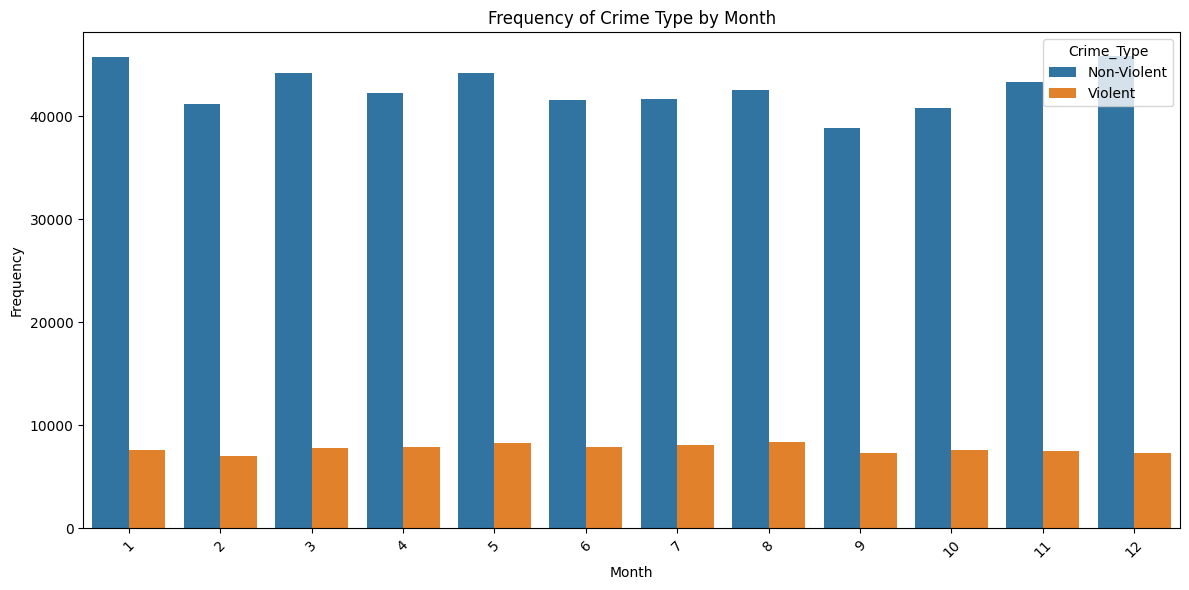

In [96]:
# Violent vs Non-Violent in each month
month_crime = n[['UCR CRIME CATEGORY', 'OCCURRED ON']].copy()

month_crime['UCR CRIME CATEGORY'] = month_crime['UCR CRIME CATEGORY'].astype('category')
# Convert 'OCCURRED ON' to datetime objects
month_crime['OCCURRED ON'] = pd.to_datetime(month_crime['OCCURRED ON'], errors='coerce')

# Create a new 'DATE' column
month_crime['DATE'] = month_crime['OCCURRED ON'].dt.date
# Create 'MONTH' and 'YEAR' columns
month_crime['MONTH'] = month_crime['OCCURRED ON'].dt.month.fillna(-1).astype(int).astype('category')
month_crime['YEAR'] = month_crime['OCCURRED ON'].dt.year.fillna(-1).astype(int).astype('category')

# Define crime categories
violent = ['AGGRAVATED ASSAULT', 'MURDER AND NON-NEGLIGENT MANSLAUGHTER', 'RAPE',
           'ROBBERY']
non_violent = ['ARSON', 'BURGLARY', 'DRUG OFFENSE', 'MOTOR VEHICLE THEFT',
               'LARCENY-THEFT']

# Categorize crime
def categorize_crime(crime):
    if crime in violent:
        return 'Violent'
    elif crime in non_violent:
        return 'Non-Violent'
    else:
        return 'Other'

month_crime['Crime_Type'] = month_crime['UCR CRIME CATEGORY'].apply(categorize_crime).astype('category')

print(month_crime.head())

# Group by month and crime type and count occurrences
monthly_crime_counts = month_crime.groupby(['MONTH', 'Crime_Type']).size().reset_index(name='Count')

# Exclude rows where MONTH is -1 and remove the category
monthly_crime_counts = monthly_crime_counts[monthly_crime_counts['MONTH'] != -1]
monthly_crime_counts['MONTH'] = monthly_crime_counts['MONTH'].cat.remove_unused_categories()


# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_crime_counts, x='MONTH', y='Count', hue='Crime_Type')

plt.title('Frequency of Crime Type by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1498861097.py:23: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



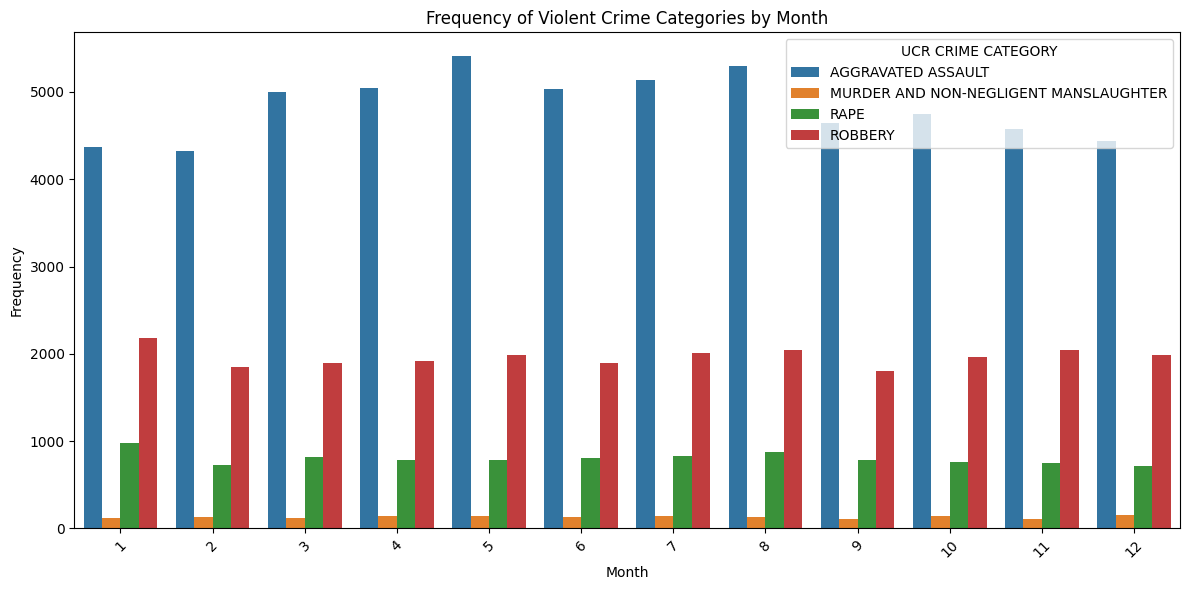

In [97]:
# Define crime categories
violent = ['AGGRAVATED ASSAULT', 'MURDER AND NON-NEGLIGENT MANSLAUGHTER', 'RAPE',
           'ROBBERY']
non_violent = ['ARSON', 'BURGLARY', 'DRUG OFFENSE', 'MOTOR VEHICLE THEFT',
               'LARCENY-THEFT']

# Categorize crime
def categorize_crime(crime):
    if crime in violent:
        return 'Violent'
    elif crime in non_violent:
        return 'Non-Violent'
    else:
        return 'Other'

# Add the 'Crime_Type' column to month_crime
month_crime['Crime_Type'] = month_crime['UCR CRIME CATEGORY'].apply(categorize_crime).astype('category')

# Filter for violent crimes
violent_crime_data = month_crime[month_crime['Crime_Type'] == 'Violent'].copy()

# Group by month and specific violent crime categories and count occurrences
monthly_violent_crime_counts = violent_crime_data.groupby(['MONTH', 'UCR CRIME CATEGORY']).size().reset_index(name='Count')

# Exclude rows where MONTH is -1 and remove unused categories
monthly_violent_crime_counts = monthly_violent_crime_counts[monthly_violent_crime_counts['MONTH'] != -1]
monthly_violent_crime_counts['MONTH'] = monthly_violent_crime_counts['MONTH'].cat.remove_unused_categories()


# Remove rows where count is equal to 0
monthly_violent_crime_counts = monthly_violent_crime_counts[monthly_violent_crime_counts['Count'] > 0]
monthly_violent_crime_counts['UCR CRIME CATEGORY'] = monthly_violent_crime_counts['UCR CRIME CATEGORY'].cat.remove_unused_categories()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_violent_crime_counts, x='MONTH', y='Count', hue='UCR CRIME CATEGORY')

plt.title('Frequency of Violent Crime Categories by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [98]:
# Group location and crime
location_crime = n[['UCR CRIME CATEGORY', 'PREMISE TYPE', 'ZIP']]
location_crime['UCR CRIME CATEGORY'] = location_crime['UCR CRIME CATEGORY'].astype('category')
location_crime['PREMISE TYPE'] = location_crime['PREMISE TYPE'].astype('category')
location_crime['ZIP'] = location_crime['ZIP'].fillna(-1).astype(int).astype('category')
print(location_crime.head())

# Aggregate the data for the Sankey plot
sankey_data = location_crime.groupby(['ZIP', 'PREMISE TYPE', 'UCR CRIME CATEGORY']).size().reset_index(name='Count')

# Get the top 5 zip codes based on total crime count
zip_total_counts = location_crime['ZIP'].value_counts().reset_index()
zip_total_counts.columns = ['ZIP', 'Total_Count']
top_5_zips = zip_total_counts['ZIP'].head(5).tolist()

# Filter the sankey_data to include only the top 5 zipcodes
sankey_data_filtered = sankey_data[sankey_data['ZIP'].isin(top_5_zips)]
monthly_violent_crime_counts = monthly_violent_crime_counts[monthly_violent_crime_counts['Count'] > 0]
sankey_data_filtered = sankey_data_filtered[sankey_data_filtered['Count'] > 500]
print(sankey_data_filtered.head())


# Create labels and nodes for the Sankey plot
labels = []
source = []
target = []
value = []

label_map = {}

def add_node(label):
    if label not in label_map:
        label_map[label] = len(labels)
        labels.append(label)
    return label_map[label]

for index, row in sankey_data_filtered.iterrows():
    zip_node = add_node(f"{row['ZIP']}")
    premise_node = add_node(f"{row['PREMISE TYPE']}")
    crime_node = add_node(f"{row['UCR CRIME CATEGORY']}")

    source.append(zip_node)
    target.append(premise_node)
    value.append(row['Count'])

    source.append(premise_node)
    target.append(crime_node)
    value.append(row['Count'])

# Create the Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
    )
)])

fig.update_layout(title_text="Crime Flow from ZIP to Premise to Crime Category (Top 5 ZIP Codes)", font_size=10, height=800, width=1000)
fig.show()

    UCR CRIME CATEGORY         PREMISE TYPE    ZIP
0                 RAPE  SINGLE FAMILY HOUSE  85006
1        LARCENY-THEFT            APARTMENT  85014
2        LARCENY-THEFT          PARKING LOT  85014
3  MOTOR VEHICLE THEFT  SINGLE FAMILY HOUSE  85043
4  MOTOR VEHICLE THEFT  SINGLE FAMILY HOUSE  85029
        ZIP                PREMISE TYPE   UCR CRIME CATEGORY  Count
4455  85008                   APARTMENT   AGGRAVATED ASSAULT   1170
4457  85008                   APARTMENT             BURGLARY   1005
4459  85008                   APARTMENT        LARCENY-THEFT   2108
4460  85008                   APARTMENT  MOTOR VEHICLE THEFT    989
4639  85008  CONVENIENCE MARKET / STORE        LARCENY-THEFT    813


/tmp/ipython-input-2168928211.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2168928211.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2168928211.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-216